In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests

import matplotlib.dates as mdates
weeks = mdates.DayLocator(interval=7)
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

In [14]:
url = 'https://covidtracking.com/api/v1/states/daily.json'
r = requests.get(url=url) 
df = pd.DataFrame.from_dict(r.json())
df.head()
dat.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'datetime', 'positivity'],
      dtype='object')

In [16]:
df['datetime'] = [datetime.strptime(str(x), '%Y%m%d') for x in df['date']]
df['positivity'] = df['positive'] / df['totalTestResults'] * 100

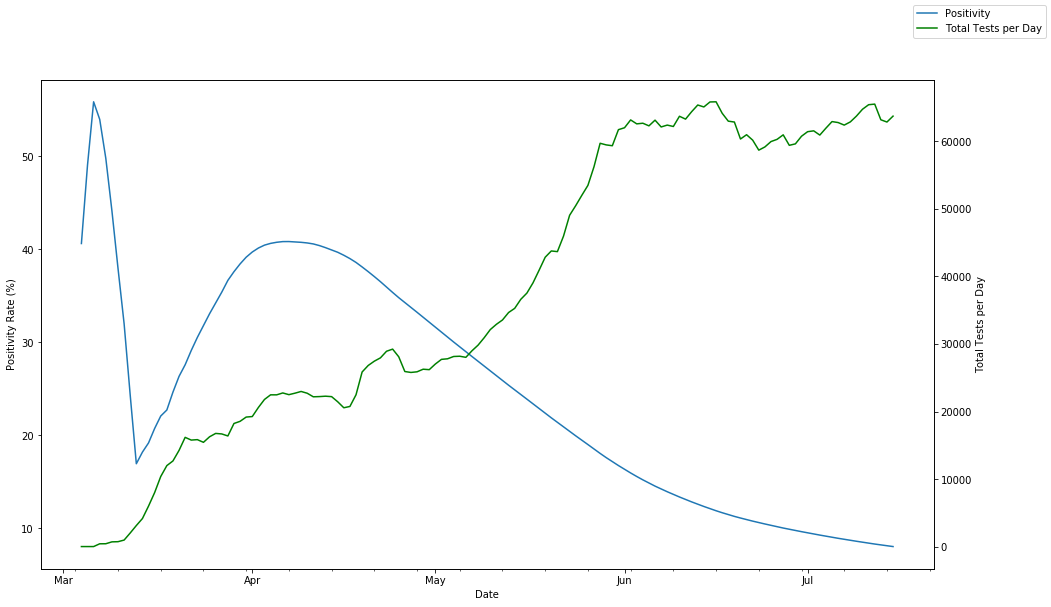

In [27]:
ny = df[df['state'] == 'NY']
fig, ax1 = plt.subplots(figsize=(16, 9))
ax2 = ax1.twinx()
ax1.plot(ny['datetime'], ny['positivity'].rolling(7).mean(), label='Positivity')
ax2.plot(ny['datetime'], ny['totalTestResultsIncrease'].rolling(7).mean(), label='Total Tests per Day', color='g')
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(months_fmt)
ax1.xaxis.set_minor_locator(weeks)
ax1.set_xlabel('Date')
ax1.set_ylabel('Positivity Rate (%)')
ax2.set_ylabel('Total Tests per Day')
fig.legend()
plt.show()